<a href="https://colab.research.google.com/github/EVA5-Stars/S6/blob/master/EVA5_Submission_Session_6_inprogress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Objective take best 5th code, and run below versions for 25 epochs and report findings:

>> 1. with L1 + BN
2. with L2 + BN
3. with L1 and L2 with BN
4. with GBN
5. with L1 and L2 with GBN


* *You need to write a single loop or iterator to iterate through these conditions.*

* Draw ONE graph to show the validation accuracy curves for all 5 jobs above. This graph must have proper legends and it should be clear what we are looking at.

* Draw ONE graph to show the loss change curves for all 5 jobs above. This graph must have proper legends and it should be clear what we are looking at.

* Find any 25 misclassified images (combined into single image) for "with GBN" model. You should be using the saved model from the above jobs.  You MUST show the actual and predicted class names.

Submitted By: 
* Gaurav Makkar
* Mohit Bhandari
* Suman Debnath
* Sriram Iyengar




## Import `pytorch` libraries and modules:

In [23]:
from __future__ import print_function
import torch
#import nueral net model in the torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
#torchvision is the libraray in torch that has many features
#and we are using datasets and transforms from this library 
from torchvision import datasets, transforms

In [24]:
!rm -rf S6
!git clone https://github.com/rsriramiyengar/S6.git

Cloning into 'S6'...
remote: Enumerating objects: 126, done.
remote: Counting objects: 100% (126/126), done.
remote: Compressing objects: 100% (63/63), done.
remote: Total 126 (delta 72), reused 107 (delta 62), pack-reused 0
Receiving objects: 100% (126/126), 78.74 KiB | 726.00 KiB/s, done.
Resolving deltas: 100% (72/72), done.


In [25]:
%matplotlib inline
import matplotlib.pyplot as plt

In [26]:
from google.colab import drive
drive.mount('/content/gdrive')

!ls /content/gdrive/My\ Drive/Colab\ Notebooks/EVA5/

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
EVA5:Submission-Session_6_Model-BatchNormalization.pt
EVA5:Submission-Session_6_Model-GhostBatchNormalization.pt


In [27]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

## Project Library:

*   Ghost Batch Normalization
*   Misclassified image collection
*   Load the testing and training data with configurabe *batch_size*
*   Plot the Loss and Accuracy Graph
*   Define the structure of the network
*   Setup to create model and summary
*   Load the testing and training data with configurabe *batch_size*
*   Define test and train functions
*   Create a function to *initiate_training* for all conditions





**Ghost Batch Normalization**: 

A technique originally developed for training with very large batch sizes across many accelerators. 

In [28]:
from S6.BatchNorm_GhostBatchNorm import GhostBatchNorm
from S6.BatchNorm_GhostBatchNorm import BatchNorm

**Collecting Misclassified Images**

In [29]:
#from S6.S6_plot_misclassfied_image_finder import misclassified_image_finder              
def misclassified_image_finder(model, model_path, device, train_loader, image_num, msg):
    
    data_iter = iter(test_loader)
    figure = plt.figure()

    plt.title('Misclassified Images: With {}'.format(msg))
   
    for _i in range(image_num):
          data, target = data_iter.next()

          model.load_state_dict(torch.load(model_path)) 
          model.eval()

          data, target = data.to(device), target.to(device)

          output = model(data)
          pred = output.argmax(dim=1, keepdim=True) 

          for a in range(256):
              if(pred[a]!=target[a]):
                  
                  plt.subplot(5,5,_i+1)
                  plt.axis('off')
                  plt.imshow(data[a].cpu().numpy().squeeze(),cmap='gray_r')

Plot the Loss and Accuracy Graph

In [30]:
from S6.S6_plot_stat_loss_acc import plot_stat

Define the structure of the network

In [31]:
from S6.S6_Model_structure_create import Net

Setup to create model and summary

In [32]:
from S6.S6_Model_structure_create import create_model

Load the testing and training data with configurabe *batch_size*

In [33]:
from S6.S6_data_loader import init_train_test_loader

Define test and train functions

In [34]:
from tqdm import tqdm

# Loss train & test
train_losses = []
test_losses = []

# Accuracy train & test
train_acc = []
test_acc = []

# Total Loss & Accuracy
total_losses = []
total_accuracies = []

from S6.S6_train_test_function import train
from S6.S6_train_test_function import test   


Create a function to *initiate_training* for all conditions

In [35]:
from torch.optim.lr_scheduler import StepLR
from S6.S6_init_training import init_training   

## Run: Initialization and trainings

Create the model with normal BatchNormalization

In [36]:
model = create_model(device,gbatnor=False)
model_name_bn = "EVA5:Submission-Session_6_Model-BatchNormalization.pt"
save_path_bn = F"/content/gdrive/My Drive/Colab Notebooks/EVA5/{model_name_bn}"
torch.save(model.state_dict(), save_path_bn)
print("Model Saved: {}".format(model_name_bn))

# Set the Epoch
EPOCHS = 25


Create the instance of the Net class with GBN = False
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 26, 26]              72
              ReLU-2            [-1, 8, 26, 26]               0
       BatchNorm2d-3            [-1, 8, 26, 26]              16
            Conv2d-4           [-1, 16, 24, 24]           1,152
              ReLU-5           [-1, 16, 24, 24]               0
       BatchNorm2d-6           [-1, 16, 24, 24]              32
         MaxPool2d-7           [-1, 16, 12, 12]               0
            Conv2d-8            [-1, 8, 12, 12]             128
              ReLU-9            [-1, 8, 12, 12]               0
      BatchNorm2d-10            [-1, 8, 12, 12]              16
           Conv2d-11           [-1, 16, 10, 10]           1,152
             ReLU-12           [-1, 16, 10, 10]               0
      BatchNorm2d-13           [-1, 16, 10, 10]  

1. with L1 + BN


In [40]:
train_loader, test_loader = init_train_test_loader()

# with L1 and BN
test_losses = []
test_acc = []
train_losses,train_acc,test_losses,test_acc=init_training(model, device, train_loader, EPOCHS, False, 1e-5, False)

total_losses.extend([test_losses])




total_accuracies.extend([test_acc])
print(test_losses,test_acc)



Loss=2.2621045112609863 Batch_id=0 Accuracy=8.59:   0%|          | 0/469 [00:00<?, ?it/s]


 Initialize train and test loader with Batch Size:128

 Epoch 1, lr 0.01



Test set: Average loss: 2.3041, Accuracy: 1135/10000 (11.35%)

[[2.302591255187988, 2.3025746597290038, 2.3026596923828127, 2.302801675415039, 2.3030820613861085, 2.3027950775146486, 2.3030835990905763, 2.3035001945495606, 2.304113479232788]] [[10.1, 10.1, 10.1, 10.1, 10.1, 11.35, 11.35, 11.35, 11.35]]


2. with L2 + BN


In [ ]:
# with L2 and BN
init_training(model, device, train_loader, EPOCHS, False, None, True)

total_losses.extend([test_losses])
test_losses = []

total_accuracies.extend([test_acc])
test_acc = []

Loss=0.040658291429281235 Batch_id=468 Accuracy=99.04: 100%|██████████| 469/469 [00:59<00:00,  7.94it/s]



 Epoch 0, lr 0.01


Loss=0.05666148290038109 Batch_id=0 Accuracy=97.66:   0%|          | 1/469 [00:00<00:57,  8.11it/s]


Test set: Average loss: 0.0260, Accuracy: 9933/10000 (99.33%)



Loss=0.05636999383568764 Batch_id=468 Accuracy=99.03: 100%|██████████| 469/469 [00:59<00:00,  7.88it/s]



 Epoch 1, lr 0.01


Loss=0.03984266147017479 Batch_id=0 Accuracy=98.44:   0%|          | 1/469 [00:00<01:00,  7.70it/s]


Test set: Average loss: 0.0273, Accuracy: 9922/10000 (99.22%)



Loss=0.019734414294362068 Batch_id=468 Accuracy=99.00: 100%|██████████| 469/469 [00:59<00:00,  7.90it/s]



 Epoch 2, lr 0.01


Loss=0.02317867986857891 Batch_id=0 Accuracy=100.00:   0%|          | 1/469 [00:00<01:00,  7.80it/s]


Test set: Average loss: 0.0260, Accuracy: 9932/10000 (99.32%)



Loss=0.024960778653621674 Batch_id=468 Accuracy=99.08: 100%|██████████| 469/469 [00:58<00:00,  7.97it/s]



 Epoch 3, lr 0.01


Loss=0.028146887198090553 Batch_id=0 Accuracy=99.22:   0%|          | 1/469 [00:00<00:59,  7.80it/s]


Test set: Average loss: 0.0279, Accuracy: 9920/10000 (99.20%)



Loss=0.098335862159729 Batch_id=468 Accuracy=99.11: 100%|██████████| 469/469 [00:59<00:00,  7.93it/s]



 Epoch 4, lr 0.01


Loss=0.029547877609729767 Batch_id=0 Accuracy=100.00:   0%|          | 1/469 [00:00<00:58,  8.03it/s]


Test set: Average loss: 0.0271, Accuracy: 9929/10000 (99.29%)



Loss=0.020964620634913445 Batch_id=468 Accuracy=99.12: 100%|██████████| 469/469 [00:59<00:00,  7.88it/s]



 Epoch 5, lr 0.01


Loss=0.004954800475388765 Batch_id=0 Accuracy=100.00:   0%|          | 1/469 [00:00<01:04,  7.20it/s]


Test set: Average loss: 0.0262, Accuracy: 9928/10000 (99.28%)



Loss=0.056779902428388596 Batch_id=468 Accuracy=99.03: 100%|██████████| 469/469 [00:59<00:00,  7.87it/s]



 Epoch 6, lr 0.01


Loss=0.028801145032048225 Batch_id=0 Accuracy=99.22:   0%|          | 1/469 [00:00<00:57,  8.16it/s]


Test set: Average loss: 0.0244, Accuracy: 9934/10000 (99.34%)



Loss=0.04950197413563728 Batch_id=468 Accuracy=99.14: 100%|██████████| 469/469 [00:59<00:00,  7.88it/s]



 Epoch 7, lr 0.01


Loss=0.08011111617088318 Batch_id=0 Accuracy=97.66:   0%|          | 1/469 [00:00<00:58,  7.99it/s]


Test set: Average loss: 0.0230, Accuracy: 9945/10000 (99.45%)



Loss=0.006559150759130716 Batch_id=468 Accuracy=99.08: 100%|██████████| 469/469 [00:59<00:00,  7.94it/s]



 Epoch 8, lr 0.01


Loss=0.010486560873687267 Batch_id=0 Accuracy=100.00:   0%|          | 1/469 [00:00<00:58,  7.96it/s]


Test set: Average loss: 0.0231, Accuracy: 9934/10000 (99.34%)



Loss=0.020252937451004982 Batch_id=468 Accuracy=99.13: 100%|██████████| 469/469 [00:59<00:00,  7.93it/s]



 Epoch 9, lr 0.01


Loss=0.026345428079366684 Batch_id=0 Accuracy=99.22:   0%|          | 1/469 [00:00<01:00,  7.80it/s]


Test set: Average loss: 0.0242, Accuracy: 9934/10000 (99.34%)



Loss=0.0120016448199749 Batch_id=468 Accuracy=99.14: 100%|██████████| 469/469 [00:59<00:00,  7.87it/s]



 Epoch 10, lr 0.01


Loss=0.04213114082813263 Batch_id=0 Accuracy=97.66:   0%|          | 1/469 [00:00<00:58,  8.05it/s]


Test set: Average loss: 0.0232, Accuracy: 9937/10000 (99.37%)



Loss=0.029479624703526497 Batch_id=468 Accuracy=99.21: 100%|██████████| 469/469 [00:59<00:00,  7.83it/s]



 Epoch 11, lr 0.01


Loss=0.006022406741976738 Batch_id=0 Accuracy=100.00:   0%|          | 1/469 [00:00<00:57,  8.16it/s]


Test set: Average loss: 0.0230, Accuracy: 9939/10000 (99.39%)



Loss=0.03107680194079876 Batch_id=468 Accuracy=99.15: 100%|██████████| 469/469 [01:00<00:00,  7.81it/s]



 Epoch 12, lr 0.01


Loss=0.04613829404115677 Batch_id=0 Accuracy=98.44:   0%|          | 1/469 [00:00<00:57,  8.10it/s]


Test set: Average loss: 0.0240, Accuracy: 9940/10000 (99.40%)



Loss=0.04854699969291687 Batch_id=468 Accuracy=99.12: 100%|██████████| 469/469 [01:00<00:00,  7.74it/s]



 Epoch 13, lr 0.01


Loss=0.04859698563814163 Batch_id=0 Accuracy=98.44:   0%|          | 1/469 [00:00<01:00,  7.80it/s]


Test set: Average loss: 0.0220, Accuracy: 9940/10000 (99.40%)



Loss=0.05486845597624779 Batch_id=468 Accuracy=99.20: 100%|██████████| 469/469 [01:01<00:00,  7.57it/s]



 Epoch 14, lr 0.01


Loss=0.04379371181130409 Batch_id=0 Accuracy=97.66:   0%|          | 1/469 [00:00<01:02,  7.44it/s]


Test set: Average loss: 0.0226, Accuracy: 9935/10000 (99.35%)



Loss=0.02937142364680767 Batch_id=468 Accuracy=99.11: 100%|██████████| 469/469 [01:02<00:00,  7.51it/s]



 Epoch 15, lr 0.01


Loss=0.03193943202495575 Batch_id=0 Accuracy=100.00:   0%|          | 1/469 [00:00<01:01,  7.61it/s]


Test set: Average loss: 0.0248, Accuracy: 9930/10000 (99.30%)



Loss=0.09434094280004501 Batch_id=468 Accuracy=99.18: 100%|██████████| 469/469 [01:01<00:00,  7.59it/s]



 Epoch 16, lr 0.01


Loss=0.020343486219644547 Batch_id=0 Accuracy=99.22:   0%|          | 1/469 [00:00<00:59,  7.81it/s]


Test set: Average loss: 0.0254, Accuracy: 9929/10000 (99.29%)



Loss=0.031502846628427505 Batch_id=468 Accuracy=99.23: 100%|██████████| 469/469 [01:02<00:00,  7.49it/s]



 Epoch 17, lr 0.01


Loss=0.050973713397979736 Batch_id=0 Accuracy=98.44:   0%|          | 1/469 [00:00<01:00,  7.80it/s]


Test set: Average loss: 0.0218, Accuracy: 9935/10000 (99.35%)



Loss=0.01245348434895277 Batch_id=468 Accuracy=99.19: 100%|██████████| 469/469 [01:01<00:00,  7.64it/s]



 Epoch 18, lr 0.01


Loss=0.018817689269781113 Batch_id=0 Accuracy=100.00:   0%|          | 1/469 [00:00<00:58,  8.01it/s]


Test set: Average loss: 0.0220, Accuracy: 9943/10000 (99.43%)



Loss=0.05300738289952278 Batch_id=468 Accuracy=99.26: 100%|██████████| 469/469 [01:01<00:00,  7.68it/s]



 Epoch 19, lr 0.01


Loss=0.05665907263755798 Batch_id=0 Accuracy=99.22:   0%|          | 1/469 [00:00<01:01,  7.60it/s]


Test set: Average loss: 0.0228, Accuracy: 9932/10000 (99.32%)



Loss=0.07471834868192673 Batch_id=468 Accuracy=99.21: 100%|██████████| 469/469 [01:01<00:00,  7.65it/s]



 Epoch 20, lr 0.01


Loss=0.04792611300945282 Batch_id=0 Accuracy=97.66:   0%|          | 1/469 [00:00<00:59,  7.88it/s]


Test set: Average loss: 0.0232, Accuracy: 9938/10000 (99.38%)



Loss=0.04556789621710777 Batch_id=468 Accuracy=99.17: 100%|██████████| 469/469 [01:01<00:00,  7.62it/s]



 Epoch 21, lr 0.01


Loss=0.01071576401591301 Batch_id=0 Accuracy=100.00:   0%|          | 1/469 [00:00<01:05,  7.12it/s]


Test set: Average loss: 0.0232, Accuracy: 9937/10000 (99.37%)



Loss=0.02334938384592533 Batch_id=468 Accuracy=99.17: 100%|██████████| 469/469 [01:02<00:00,  7.48it/s]



 Epoch 22, lr 0.01


Loss=0.030906517058610916 Batch_id=0 Accuracy=99.22:   0%|          | 1/469 [00:00<01:03,  7.32it/s]


Test set: Average loss: 0.0228, Accuracy: 9934/10000 (99.34%)



Loss=0.026774534955620766 Batch_id=468 Accuracy=99.31: 100%|██████████| 469/469 [01:02<00:00,  7.54it/s]



 Epoch 23, lr 0.01


Loss=0.025897925719618797 Batch_id=0 Accuracy=100.00:   0%|          | 1/469 [00:00<01:00,  7.72it/s]


Test set: Average loss: 0.0215, Accuracy: 9936/10000 (99.36%)



Loss=0.013348064385354519 Batch_id=468 Accuracy=99.24: 100%|██████████| 469/469 [01:01<00:00,  7.57it/s]



 Epoch 24, lr 0.01

Test set: Average loss: 0.0211, Accuracy: 9935/10000 (99.35%)



3. with L1 and L2 with BN


In [ ]:
# with L1, L2 and BN
init_training(model, device, train_loader, EPOCHS, True, 1e-5, True)

total_losses.extend([test_losses])
test_losses = []

total_accuracies.extend([test_acc])
test_acc = []

Loss=0.027782879769802094 Batch_id=468 Accuracy=99.22: 100%|██████████| 469/469 [01:02<00:00,  7.45it/s]



 Epoch 0, lr 0.01


Loss=0.01547170989215374 Batch_id=0 Accuracy=100.00:   0%|          | 1/469 [00:00<01:01,  7.59it/s]


Test set: Average loss: 0.0223, Accuracy: 9938/10000 (99.38%)



Loss=0.035238783806562424 Batch_id=468 Accuracy=99.24: 100%|██████████| 469/469 [01:02<00:00,  7.53it/s]



 Epoch 1, lr 0.01


Loss=0.04833422601222992 Batch_id=0 Accuracy=99.22:   0%|          | 1/469 [00:00<00:59,  7.84it/s]


Test set: Average loss: 0.0207, Accuracy: 9945/10000 (99.45%)



Loss=0.029825687408447266 Batch_id=468 Accuracy=99.27: 100%|██████████| 469/469 [01:02<00:00,  7.46it/s]



 Epoch 2, lr 0.01


Loss=0.034125082194805145 Batch_id=0 Accuracy=99.22:   0%|          | 1/469 [00:00<01:03,  7.41it/s]


Test set: Average loss: 0.0229, Accuracy: 9923/10000 (99.23%)



Loss=0.03861290588974953 Batch_id=468 Accuracy=99.25: 100%|██████████| 469/469 [01:02<00:00,  7.51it/s]



 Epoch 3, lr 0.01


Loss=0.022198449820280075 Batch_id=0 Accuracy=100.00:   0%|          | 1/469 [00:00<01:03,  7.40it/s]


Test set: Average loss: 0.0214, Accuracy: 9938/10000 (99.38%)



Loss=0.033669404685497284 Batch_id=468 Accuracy=99.25: 100%|██████████| 469/469 [01:02<00:00,  7.49it/s]



 Epoch 4, lr 0.001


Loss=0.018934395164251328 Batch_id=0 Accuracy=100.00:   0%|          | 1/469 [00:00<00:59,  7.81it/s]


Test set: Average loss: 0.0197, Accuracy: 9945/10000 (99.45%)



Loss=0.031307220458984375 Batch_id=468 Accuracy=99.36: 100%|██████████| 469/469 [01:02<00:00,  7.50it/s]



 Epoch 5, lr 0.001


Loss=0.014278053306043148 Batch_id=0 Accuracy=100.00:   0%|          | 1/469 [00:00<01:00,  7.68it/s]


Test set: Average loss: 0.0179, Accuracy: 9951/10000 (99.51%)



Loss=0.03280933201313019 Batch_id=468 Accuracy=99.40: 100%|██████████| 469/469 [01:02<00:00,  7.47it/s]



 Epoch 6, lr 0.001


Loss=0.027145173400640488 Batch_id=0 Accuracy=99.22:   0%|          | 1/469 [00:00<01:00,  7.68it/s]


Test set: Average loss: 0.0176, Accuracy: 9950/10000 (99.50%)



Loss=0.033936165273189545 Batch_id=468 Accuracy=99.44: 100%|██████████| 469/469 [01:02<00:00,  7.52it/s]



 Epoch 7, lr 0.001


Loss=0.030642002820968628 Batch_id=0 Accuracy=99.22:   0%|          | 1/469 [00:00<01:04,  7.22it/s]


Test set: Average loss: 0.0179, Accuracy: 9950/10000 (99.50%)



Loss=0.011336056515574455 Batch_id=468 Accuracy=99.43: 100%|██████████| 469/469 [01:02<00:00,  7.51it/s]



 Epoch 8, lr 0.001


Loss=0.04192498326301575 Batch_id=0 Accuracy=98.44:   0%|          | 1/469 [00:00<01:03,  7.37it/s]


Test set: Average loss: 0.0179, Accuracy: 9951/10000 (99.51%)



Loss=0.02609669417142868 Batch_id=468 Accuracy=99.45: 100%|██████████| 469/469 [01:02<00:00,  7.49it/s]



 Epoch 9, lr 0.0001


Loss=0.0303372573107481 Batch_id=0 Accuracy=99.22:   0%|          | 1/469 [00:00<01:00,  7.73it/s]


Test set: Average loss: 0.0179, Accuracy: 9950/10000 (99.50%)



Loss=0.019560091197490692 Batch_id=468 Accuracy=99.42: 100%|██████████| 469/469 [01:02<00:00,  7.48it/s]



 Epoch 10, lr 0.0001


Loss=0.04165663197636604 Batch_id=0 Accuracy=99.22:   0%|          | 1/469 [00:00<01:00,  7.70it/s]


Test set: Average loss: 0.0175, Accuracy: 9950/10000 (99.50%)



Loss=0.031648747622966766 Batch_id=468 Accuracy=99.47: 100%|██████████| 469/469 [01:03<00:00,  7.42it/s]



 Epoch 11, lr 0.0001


Loss=0.016584668308496475 Batch_id=0 Accuracy=100.00:   0%|          | 1/469 [00:00<01:04,  7.23it/s]


Test set: Average loss: 0.0178, Accuracy: 9951/10000 (99.51%)



Loss=0.034414347261190414 Batch_id=468 Accuracy=99.44: 100%|██████████| 469/469 [01:02<00:00,  7.47it/s]



 Epoch 12, lr 0.0001


Loss=0.042249295860528946 Batch_id=0 Accuracy=99.22:   0%|          | 1/469 [00:00<01:00,  7.71it/s]


Test set: Average loss: 0.0176, Accuracy: 9951/10000 (99.51%)



Loss=0.05853375419974327 Batch_id=468 Accuracy=99.41: 100%|██████████| 469/469 [01:02<00:00,  7.49it/s]



 Epoch 13, lr 0.0001


Loss=0.019418731331825256 Batch_id=0 Accuracy=100.00:   0%|          | 1/469 [00:00<01:03,  7.37it/s]


Test set: Average loss: 0.0175, Accuracy: 9953/10000 (99.53%)



Loss=0.05541583150625229 Batch_id=468 Accuracy=99.48: 100%|██████████| 469/469 [01:02<00:00,  7.48it/s]



 Epoch 14, lr 1e-05


Loss=0.022782204672694206 Batch_id=0 Accuracy=100.00:   0%|          | 1/469 [00:00<01:04,  7.26it/s]


Test set: Average loss: 0.0175, Accuracy: 9952/10000 (99.52%)



Loss=0.015310678631067276 Batch_id=468 Accuracy=99.48: 100%|██████████| 469/469 [01:02<00:00,  7.45it/s]



 Epoch 15, lr 1e-05


Loss=0.03615662455558777 Batch_id=0 Accuracy=99.22:   0%|          | 1/469 [00:00<01:03,  7.32it/s]


Test set: Average loss: 0.0178, Accuracy: 9951/10000 (99.51%)



Loss=0.019937504082918167 Batch_id=468 Accuracy=99.47: 100%|██████████| 469/469 [01:03<00:00,  7.39it/s]



 Epoch 16, lr 1e-05


Loss=0.019417256116867065 Batch_id=0 Accuracy=100.00:   0%|          | 1/469 [00:00<01:02,  7.48it/s]


Test set: Average loss: 0.0176, Accuracy: 9948/10000 (99.48%)



Loss=0.04277203232049942 Batch_id=468 Accuracy=99.44: 100%|██████████| 469/469 [01:03<00:00,  7.43it/s]



 Epoch 17, lr 1e-05


Loss=0.016285020858049393 Batch_id=0 Accuracy=100.00:   0%|          | 1/469 [00:00<01:00,  7.77it/s]


Test set: Average loss: 0.0173, Accuracy: 9955/10000 (99.55%)



Loss=0.023914232850074768 Batch_id=468 Accuracy=99.47: 100%|██████████| 469/469 [01:03<00:00,  7.40it/s]



 Epoch 18, lr 1e-05


Loss=0.029394634068012238 Batch_id=0 Accuracy=99.22:   0%|          | 1/469 [00:00<01:01,  7.56it/s]


Test set: Average loss: 0.0178, Accuracy: 9948/10000 (99.48%)



Loss=0.01808067597448826 Batch_id=468 Accuracy=99.44: 100%|██████████| 469/469 [01:03<00:00,  7.43it/s]



 Epoch 19, lr 1.0000000000000002e-06


Loss=0.026923134922981262 Batch_id=0 Accuracy=100.00:   0%|          | 1/469 [00:00<01:07,  6.95it/s]


Test set: Average loss: 0.0175, Accuracy: 9949/10000 (99.49%)



Loss=0.0192553848028183 Batch_id=468 Accuracy=99.50: 100%|██████████| 469/469 [01:03<00:00,  7.35it/s]



 Epoch 20, lr 1.0000000000000002e-06


Loss=0.032547157257795334 Batch_id=0 Accuracy=99.22:   0%|          | 1/469 [00:00<01:08,  6.88it/s]


Test set: Average loss: 0.0177, Accuracy: 9949/10000 (99.49%)



Loss=0.023412451148033142 Batch_id=468 Accuracy=99.46: 100%|██████████| 469/469 [01:04<00:00,  7.32it/s]



 Epoch 21, lr 1.0000000000000002e-06


Loss=0.03520871698856354 Batch_id=0 Accuracy=98.44:   0%|          | 1/469 [00:00<01:09,  6.70it/s]


Test set: Average loss: 0.0176, Accuracy: 9953/10000 (99.53%)



Loss=0.022992810234427452 Batch_id=468 Accuracy=99.46: 100%|██████████| 469/469 [01:03<00:00,  7.36it/s]



 Epoch 22, lr 1.0000000000000002e-06


Loss=0.020059213042259216 Batch_id=0 Accuracy=99.22:   0%|          | 1/469 [00:00<01:02,  7.46it/s]


Test set: Average loss: 0.0176, Accuracy: 9952/10000 (99.52%)



Loss=0.01716664433479309 Batch_id=468 Accuracy=99.48: 100%|██████████| 469/469 [01:04<00:00,  7.32it/s]



 Epoch 23, lr 1.0000000000000002e-06


Loss=0.020305030047893524 Batch_id=0 Accuracy=100.00:   0%|          | 1/469 [00:00<01:00,  7.70it/s]


Test set: Average loss: 0.0176, Accuracy: 9952/10000 (99.52%)



Loss=0.027436688542366028 Batch_id=468 Accuracy=99.44: 100%|██████████| 469/469 [01:03<00:00,  7.41it/s]



 Epoch 24, lr 1.0000000000000002e-07

Test set: Average loss: 0.0179, Accuracy: 9947/10000 (99.47%)



Create the model with Ghost BatchNormalization

In [ ]:
model = create_model(device, gbatnor=True)
model_name_gbn = "EVA5:Submission-Session_6_Model-GhostBatchNormalization.pt"
save_path_gbn = F"/content/gdrive/My Drive/Colab Notebooks/EVA5/{model_name_gbn}"
torch.save(model.state_dict(), save_path_gbn)
print("Model Saved: {}".format(model_name_gbn))

Create the instance of the Net class with GBN = True
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 26, 26]              72
              ReLU-2            [-1, 8, 26, 26]               0
    GhostBatchNorm-3            [-1, 8, 26, 26]              16
            Conv2d-4           [-1, 16, 24, 24]           1,152
              ReLU-5           [-1, 16, 24, 24]               0
    GhostBatchNorm-6           [-1, 16, 24, 24]              32
         MaxPool2d-7           [-1, 16, 12, 12]               0
            Conv2d-8            [-1, 8, 12, 12]             128
              ReLU-9            [-1, 8, 12, 12]               0
   GhostBatchNorm-10            [-1, 8, 12, 12]              16
           Conv2d-11           [-1, 16, 10, 10]           1,152
             ReLU-12           [-1, 16, 10, 10]               0
   GhostBatchNorm-13           [-1, 16, 10, 10]   

4. with GBN

In [42]:
train_loader, test_loader = init_train_test_loader(500)

# with L1 and GBN
init_training(model, device, train_loader, EPOCHS, False, 1e-5, False)

total_losses.extend([test_losses])
test_losses = []

total_accuracies.extend([test_acc])
test_acc = []

  0%|          | 0/120 [00:00<?, ?it/s]


 Initialize train and test loader with Batch Size:500


Loss=2.2360382080078125 Batch_id=0 Accuracy=16.20:   0%|          | 0/120 [00:00<?, ?it/s]



 Epoch 1, lr 0.01

Test set: Average loss: 2.3049, Accuracy: 1135/10000 (11.35%)



5. with L1 and L2 with GBN

In [ ]:
# with L1, L2 and GBN
init_training(model, device, train_loader, EPOCHS, True, 1e-5, True)

total_losses.extend([test_losses])
test_losses = []

total_accuracies.extend([test_acc])
test_acc = []

Loss=0.0800144374370575 Batch_id=234 Accuracy=98.67: 100%|██████████| 235/235 [01:00<00:00,  3.90it/s]



 Epoch 0, lr 0.01


  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.0353, Accuracy: 9921/10000 (99.21%)



Loss=0.08229415118694305 Batch_id=234 Accuracy=98.77: 100%|██████████| 235/235 [00:59<00:00,  3.94it/s]



 Epoch 1, lr 0.01


  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.0341, Accuracy: 9922/10000 (99.22%)



Loss=0.055278994143009186 Batch_id=234 Accuracy=98.81: 100%|██████████| 235/235 [00:59<00:00,  3.95it/s]



 Epoch 2, lr 0.01


  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.0328, Accuracy: 9926/10000 (99.26%)



Loss=0.06768303364515305 Batch_id=234 Accuracy=98.75: 100%|██████████| 235/235 [00:59<00:00,  3.98it/s]



 Epoch 3, lr 0.01


  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.0350, Accuracy: 9920/10000 (99.20%)



Loss=0.13156276941299438 Batch_id=234 Accuracy=98.82: 100%|██████████| 235/235 [00:58<00:00,  4.01it/s]



 Epoch 4, lr 0.001


  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.0325, Accuracy: 9925/10000 (99.25%)



Loss=0.0373641662299633 Batch_id=234 Accuracy=98.94: 100%|██████████| 235/235 [00:59<00:00,  3.98it/s]



 Epoch 5, lr 0.001


  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.0288, Accuracy: 9928/10000 (99.28%)



Loss=0.07013726234436035 Batch_id=234 Accuracy=98.95: 100%|██████████| 235/235 [00:58<00:00,  3.99it/s]



 Epoch 6, lr 0.001


  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.0286, Accuracy: 9933/10000 (99.33%)



Loss=0.08420909941196442 Batch_id=234 Accuracy=98.96: 100%|██████████| 235/235 [00:58<00:00,  4.00it/s]



 Epoch 7, lr 0.001


  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.0280, Accuracy: 9935/10000 (99.35%)



Loss=0.021560411900281906 Batch_id=234 Accuracy=99.00: 100%|██████████| 235/235 [01:00<00:00,  3.89it/s]



 Epoch 8, lr 0.001


  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.0282, Accuracy: 9937/10000 (99.37%)



Loss=0.05300115421414375 Batch_id=234 Accuracy=98.95: 100%|██████████| 235/235 [00:58<00:00,  4.00it/s]



 Epoch 9, lr 0.0001


  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.0275, Accuracy: 9936/10000 (99.36%)



Loss=0.03600739687681198 Batch_id=234 Accuracy=98.99: 100%|██████████| 235/235 [00:59<00:00,  3.96it/s]



 Epoch 10, lr 0.0001


  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.0277, Accuracy: 9937/10000 (99.37%)



Loss=0.05338791385293007 Batch_id=234 Accuracy=98.98: 100%|██████████| 235/235 [00:59<00:00,  3.98it/s]



 Epoch 11, lr 0.0001


  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.0280, Accuracy: 9934/10000 (99.34%)



Loss=0.07333287596702576 Batch_id=234 Accuracy=99.01: 100%|██████████| 235/235 [00:58<00:00,  3.99it/s]



 Epoch 12, lr 0.0001


  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.0274, Accuracy: 9935/10000 (99.35%)



Loss=0.05427956581115723 Batch_id=234 Accuracy=99.01: 100%|██████████| 235/235 [00:58<00:00,  3.99it/s]



 Epoch 13, lr 0.0001


  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.0276, Accuracy: 9933/10000 (99.33%)



Loss=0.05330571159720421 Batch_id=234 Accuracy=98.99: 100%|██████████| 235/235 [00:59<00:00,  3.98it/s]



 Epoch 14, lr 1e-05


  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.0276, Accuracy: 9935/10000 (99.35%)



Loss=0.05081332102417946 Batch_id=234 Accuracy=98.95: 100%|██████████| 235/235 [00:59<00:00,  3.97it/s]



 Epoch 15, lr 1e-05


  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.0278, Accuracy: 9938/10000 (99.38%)



Loss=0.1302207112312317 Batch_id=234 Accuracy=98.98: 100%|██████████| 235/235 [00:58<00:00,  3.99it/s]



 Epoch 16, lr 1e-05


  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.0279, Accuracy: 9937/10000 (99.37%)



Loss=0.06074576824903488 Batch_id=234 Accuracy=98.98: 100%|██████████| 235/235 [00:58<00:00,  4.00it/s]



 Epoch 17, lr 1e-05


  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.0278, Accuracy: 9934/10000 (99.34%)



Loss=0.021094558760523796 Batch_id=234 Accuracy=99.03: 100%|██████████| 235/235 [00:58<00:00,  3.99it/s]



 Epoch 18, lr 1e-05


  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.0277, Accuracy: 9937/10000 (99.37%)



Loss=0.06434619426727295 Batch_id=234 Accuracy=99.03: 100%|██████████| 235/235 [00:59<00:00,  3.98it/s]



 Epoch 19, lr 1.0000000000000002e-06


  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.0278, Accuracy: 9935/10000 (99.35%)



Loss=0.0983160063624382 Batch_id=234 Accuracy=99.02: 100%|██████████| 235/235 [00:59<00:00,  3.95it/s]



 Epoch 20, lr 1.0000000000000002e-06


  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.0277, Accuracy: 9933/10000 (99.33%)



Loss=0.0872030034661293 Batch_id=234 Accuracy=99.02: 100%|██████████| 235/235 [00:59<00:00,  3.98it/s]



 Epoch 21, lr 1.0000000000000002e-06


  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.0276, Accuracy: 9937/10000 (99.37%)



Loss=0.04049811139702797 Batch_id=234 Accuracy=99.00: 100%|██████████| 235/235 [00:58<00:00,  4.00it/s]



 Epoch 22, lr 1.0000000000000002e-06


  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.0277, Accuracy: 9935/10000 (99.35%)



Loss=0.05678234249353409 Batch_id=234 Accuracy=99.01: 100%|██████████| 235/235 [00:58<00:00,  3.99it/s]



 Epoch 23, lr 1.0000000000000002e-06


  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.0279, Accuracy: 9935/10000 (99.35%)



Loss=0.026880713179707527 Batch_id=234 Accuracy=99.07: 100%|██████████| 235/235 [00:58<00:00,  4.01it/s]



 Epoch 24, lr 1.0000000000000002e-07

Test set: Average loss: 0.0277, Accuracy: 9935/10000 (99.35%)



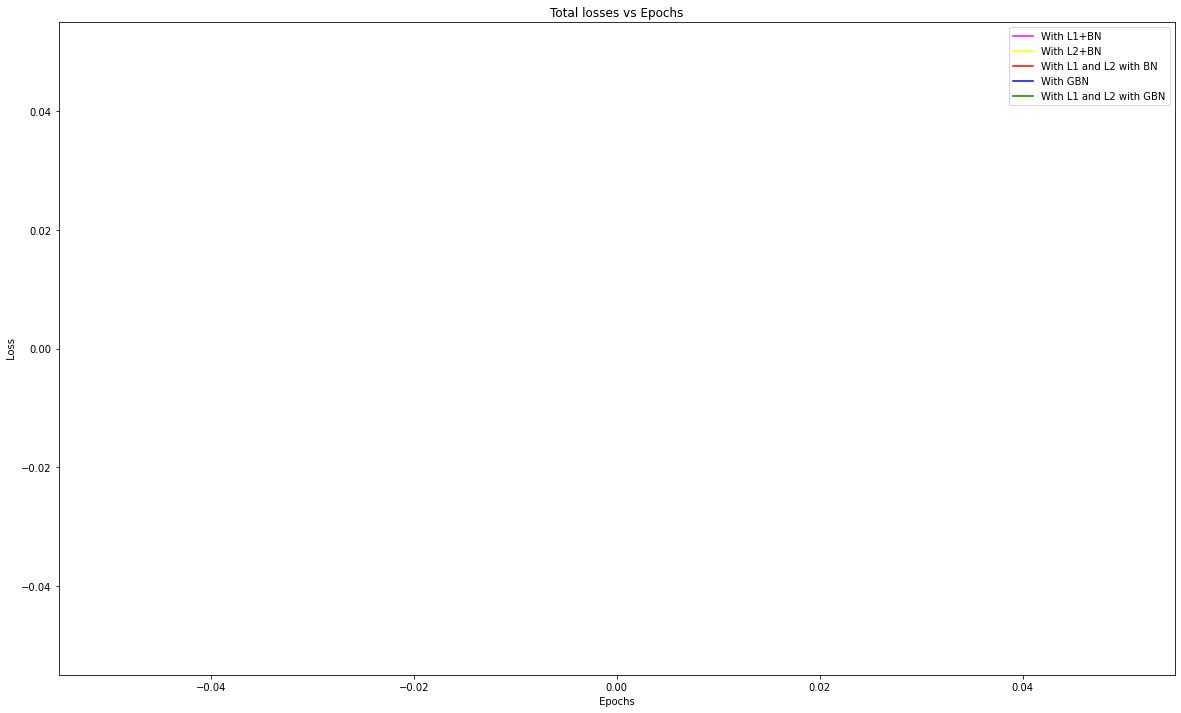

In [ ]:
# 
from S6.S6_plot_stat_loss_acc import plot_stat
plot_stat(total_losses, 'Loss')

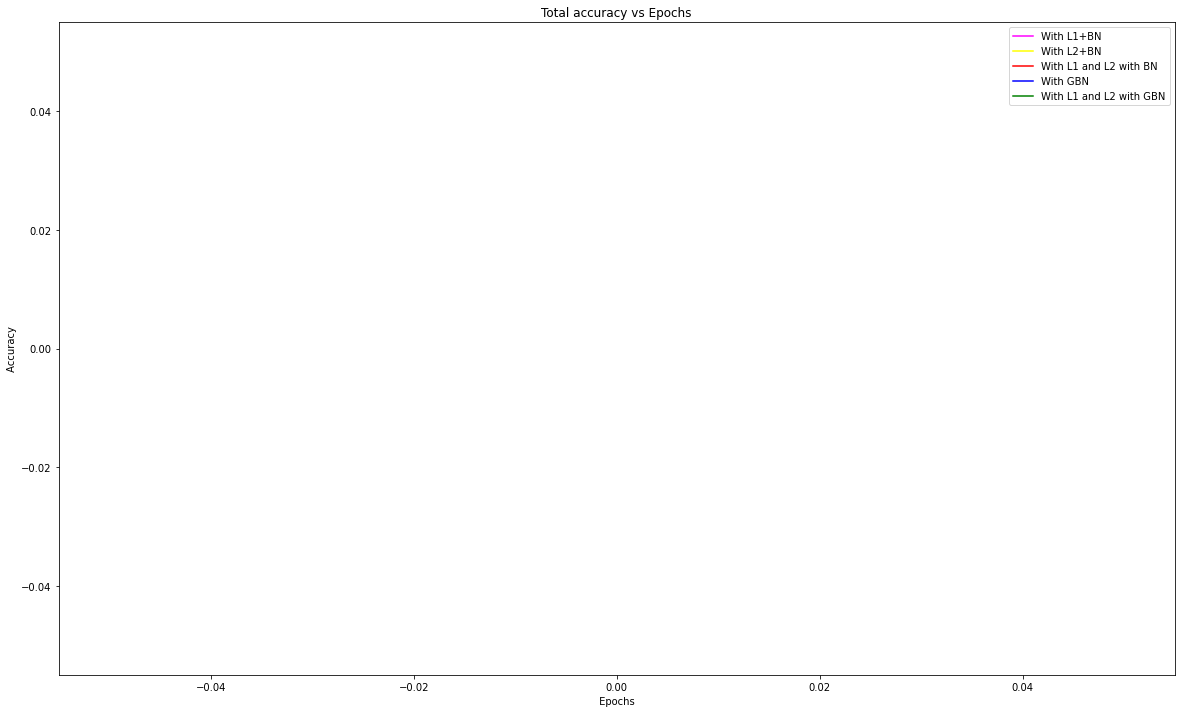

In [ ]:
# 
plot_stat(total_accuracies, 'Acc')

In [41]:
misclassified_image_finder(model, save_path_gbn, device, train_loader, EPOCHS, "Ghost Batch Normalization")

NameError: ignored

## Summary:

A simple DNN with Total params=7,612 was created and trained for 25 epochs with L1, L2 Regularization, Batch Normalization and Ghost Batch Normalization. 

Following are the accuracy observed:

> 1. with L1 + BN => **99.29%**
2. with L2 + BN => **99.31%**
3. with L1 and L2 with BN => **99.47%**
4. with GBN => **98.9%**
5. with L1 and L2 with GBN => **99.33%**

Reference:
* GBN:  https://github.com/apple/ml-cifar-10-faster/blob/master/utils.py

